## **Table of Contents**



1.   Setup
2.   OpenAI Gym Environment

In [1]:
# Installing OpenAI Gym and Arcade Learning Environment (ALE)
# https://github.com/openai/gym
# https://github.com/mgbellemare/Arcade-Learning-Environment

!pip install gym gym[atari,accept-rom-license]==0.22.0

# Installing colabgymrender, might need to use matplotlib for ec2 training and serving
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -U colabgymrender

# Installing pygame
!pip install pygame

# Installing keras-rl
!pip install keras-rl2

     |████████████████████████████████| 631 kB 8.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.6 MB 34.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708395 sha256=f36cf52b80614564240cef1a0c2122446299a87c92e6cd6208183c827569766f
  Stored in directory: /root/.cache/pip/wheels/7d/5e/87/7d50e0179edda70feff5bba05c381041e1c1fd80c6b06a4cc3
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441027 sha256=ce1c9044563a8382cabba815afe819b80ea0bd1240d5af0195f3c407974932e5
  Stored in directory: /root/.cache/pip/wheels/87/67/2e/6147e7912fe37f5408b80d07527dab807c1d25f5c403a9538a
Successfully built gym AutoROM.accept-rom-license
  Attempting uninstall: gym
    

In [ ]:
# !pip freeze

## Google drive

In [ ]:
# First add shared project folder shortcut to drive to access

from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Cloud Computing Group 3 Project'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gym
import ale_py

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
# Tensorboard needs to downgrade tensorflow to v2.3 to work, too much effort
%load_ext tensorboard 

import os
import shutil

import numpy as np

import warnings
import random

import pickle

import datetime, os

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [ ]:
# Random Seed

# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
np.random.seed(random_seed)

In [ ]:
# Check what version of TF we are using
print(tf.version.VERSION)

2.8.0


In [ ]:
# Print the number of GPUs available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Test to see if GPU is found and connected
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('\nFound GPU at: {}'.format(device_name))
  print('\nCurrently using:')
  !nvidia-smi -L

Num GPUs Available:  0
GPU device not found


# Visualization Setup

In [ ]:
# create a dummy environment to store the video of the game 
# if we were to actually store the video we would have to remove the old video every time 
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))
# we can make the display bigger here when we want to expand it

# show the output of the game
# import gym
from colabgymrender.recorder import Recorder

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2244608/45929032 bytes (4.9%)6119424/45929032 bytes (13.3%)10084352/45929032 bytes (22.0%)14131200/45929032 bytes (30.8%)18079744/45929032 bytes (39.4%)22192128/45929032 bytes (48.3%)26001408/45929032 bytes (56.6%)29810688/45929032 bytes (64.9%)33759232/45929032 bytes (73.5%)37699584/45929032 bytes (82.1%)41631744/45929032 bytes (90.6%)44695552/45929032 bytes (97.3%)

In [ ]:
# Just messing around with gym - Josh

env = gym.make('ALE/MsPacman-v5')
height, width, channels = env.observation_space.shape
actions = env.action_space.n
directory = './video'
env = Recorder(env, directory)

In [ ]:
print(height, width, channels)

210 160 3


In [ ]:
# Our agent's possible actions
env.unwrapped.get_action_meanings()

['NOOP',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'DOWNRIGHT',
 'DOWNLEFT']

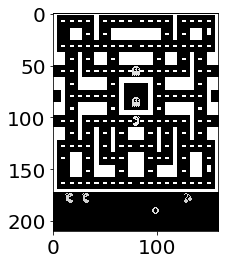

In [ ]:
plt.imshow(env.render('rgb_array')[:,:,0], cmap='gray', interpolation='nearest')

# Random Naive Agent

In [ ]:
skip = True

if not skip:
  # testing the random model 
  # code from here: https://www.youtube.com/watch?v=hCeJeq8U0lo
  # we remove env.render() and instead include env.play()
  # episodes is the number of games

  # Run for 1000 games to see what the random distribution looks like
  episodes = 1000

  random_model_scores = []
  random_model_steps = []

  for episode in range(1, episodes+1):
      state = env.reset()
      done = False
      score = 0
      steps = 0
      
      while not done:
          action = random.choice([0,1,2,3,4,5,6,7,8])
          n_state, reward, done, info = env.step(action)
          # action: int - 0,1,2,3,4,5,6,7,8
          # n_state: numpy array - dimensions (210, 160, 3) --> (height, width, RGB channels)
          # reward: float - 0.0
          # done: boolean - True, False
          # info: dictionary - {'lives': 1, 'episode_frame_number': 1892, 'frame_number': 1892}
          score += reward
          steps += 1
      print('Episode:{} Score:{} Steps:{}'.format(episode, score, steps))
      # env.play()

      random_model_scores.append(score)
      random_model_steps.append(steps)

  env.close()

Average Score of Random Model

In [ ]:
# Make scores results directory; 
directory = os.path.dirname(abspath_curr + '/results/')
if not os.path.exists(directory):
    os.makedirs(directory)

random_model_scores_file = abspath_curr + '/results/random_model_scores_1k_episodes_3_9_22.txt'
random_model_steps_file = abspath_curr + '/results/random_model_steps_1k_episodes_3_9_22.txt'

In [ ]:
# skip if not saving but just loading
# Save random_model_scores
skip = True

if not skip:
  random_model_scores = np.array(random_model_scores)
  random_model_steps = np.array(random_model_steps)
  np.savetxt(random_model_scores_file, random_model_scores, fmt='%d')
  np.savetxt(random_model_steps_file, random_model_steps, fmt='%d')

In [ ]:
random_model_scores = np.loadtxt(random_model_scores_file, dtype=int)
random_model_steps = np.loadtxt(random_model_steps_file, dtype=int)

In [ ]:
def plot_histogram(array, title, filepath):
  try:
    array = array.astype('float128')
    q25, q75 = np.percentile(array, [25, 75])
    bin_width = round(2 * (q75 - q25) * len(array) ** (-1/3))
    bins = round((array.max() - array.min()) / bin_width)
    print("Freedman–Diaconis number of bins:", bins)
  except ValueError:
    bins = 1
  except OverflowError:
    bins = round(array.shape[0]/3)

  ax = sns.displot(array, bins=bins, kde=True)
  ax.set(xlabel='Game Scores', ylabel='Count', title=title)
  ax.fig.set_size_inches(12,6)
  plt.savefig(filepath+title+'.png')
  plt.show()

  print("Min Score: {}".format(array.min()))
  print("Max Score: {}".format(array.max()))
  print("Avg Score: {}".format(array.mean()))
  print("Std Score: {}".format(array.std()))

Freedman–Diaconis number of bins: 69


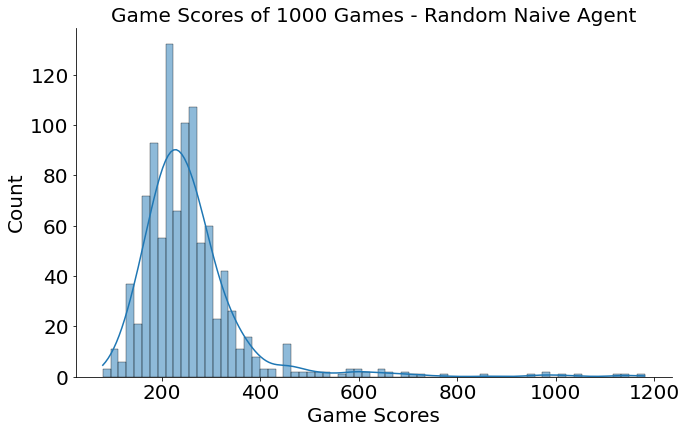

Min Score: 80.0
Max Score: 1180.0
Avg Score: 257.36
Std Score: 115.89749954162083
Freedman–Diaconis number of bins: 53


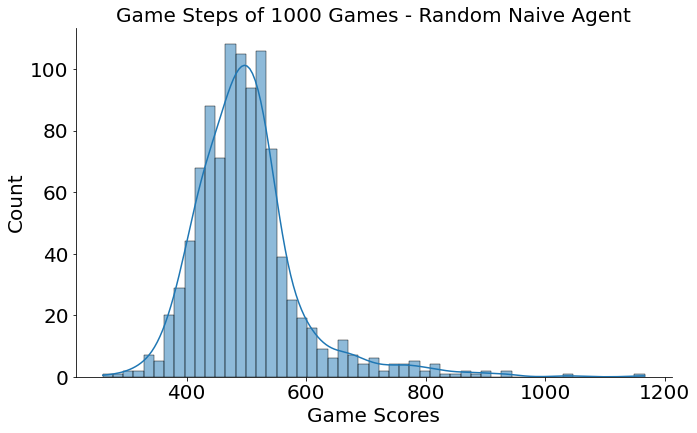

Min Score: 260.0
Max Score: 1166.0
Avg Score: 501.144
Std Score: 91.32265471393174


In [ ]:
plot_histogram(random_model_scores, 'Game Scores of 1000 Games - Random Naive Agent', abspath_curr + '/results/')
plot_histogram(random_model_steps, 'Game Steps of 1000 Games - Random Naive Agent', abspath_curr + '/results/')

# 2. Create a Deep Learning Model with Keras

In [ ]:
# Again taken from: https://www.youtube.com/watch?v=hCeJeq8U0lo
# Here we build the CNN. We can alter all of the model creation later in order to make the model as successful as possible
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam

from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.callbacks import ModelIntervalCheckpoint
from rl.core import Processor

from PIL import Image

In [ ]:
window_length = 4
# input shape must be a square
INPUT_SHAPE = (105, 105) 

In [ ]:
# To preprocess env images to grayscale and compress shape: https://github.com/keras-rl/keras-rl/blob/master/examples/dqn_atari.py
class AtariProcessor(Processor):
  def process_observation(self, observation):
    assert observation.ndim == 3  # (height, width, channel)
    img = Image.fromarray(observation)
    img = img.resize(INPUT_SHAPE).convert('L')  # resize and convert to grayscale
    processed_observation = np.array(img)
    assert processed_observation.shape == INPUT_SHAPE
    
    # To show the processed env images, kinda funny
    # plt.imshow(processed_observation,cmap='gray')
    # plt.show()
      
    return processed_observation.astype('uint8')  # saves storage in experience memory

  def process_state_batch(self, batch):
    # We could perform this processing step in `process_observation`. In this case, however,
    # we would need to store a `float32` array instead, which is 4x more memory intensive than
    # an `uint8` array. This matters if we store 1M observations.
    processed_batch = batch.astype('float32') / 255.
    return processed_batch

  def process_reward(self, reward):
    return reward
    # clipping rewards messes up the rewards output
    # return np.clip(reward, -1., 1.)

In [ ]:
# This model approximates the target Q function
def build_model(height, width, actions, window_length, model_name, channels=0):
  '''
  Function to build a copy of DeepMind's DQN model that approximates the optimal target Q function
  '''
  keras.backend.clear_session()

  if channels > 0:
    input_shape=(window_length, height, width, channels)
  else:
    input_shape=(window_length, height, width)
  inputs = layers.Input(shape = input_shape)

  conv1 = layers.Conv2D(32, (8, 8), strides=(4,4), activation='relu', padding='same', name='conv1')(inputs)
  conv2 = layers.Conv2D(64, (4, 4), strides=(2,2), activation='relu', padding='same', name='conv2')(conv1)
  conv3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv3')(conv2)

  flatten = layers.Flatten()(conv3)

  dense1 = layers.Dense(512, activation='relu')(flatten)
  dense2 = layers.Dense(256, activation='relu')(dense1)
  final_layer = layers.Dense(actions, activation='linear')(dense2)

  model = models.Model(inputs=inputs, outputs=final_layer, name=model_name)

  return model

In [ ]:
model_name = 'Dueling_DQN_Beta'
# model = build_model(INPUT_SHAPE[0], INPUT_SHAPE[1], actions, window_length, model_name, channels=channels)
model = build_model(INPUT_SHAPE[0], INPUT_SHAPE[1], actions, window_length, model_name)

In [ ]:
model.summary()

Model: "Dueling_DQN_Beta"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 105, 105)]     0         
                                                                 
 conv1 (Conv2D)              (None, 1, 27, 32)         215072    
                                                                 
 conv2 (Conv2D)              (None, 1, 14, 64)         32832     
                                                                 
 conv3 (Conv2D)              (None, 1, 14, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 512)               459264    
                                                                 
 dense_1 (Dense)             (None, 256)          

# 3. Build Agent with Keras-RL

In [ ]:
# here I needed to change enable_dueling_network to False, otherwise I was getting a recurssion error
def build_agent(model, actions, window_length, replay_memory=None):
  '''
  Function to build agent

  Parameters:
    model (keras model): keras model object
    actions (list): list of of integers representing actions
    window_length (int): integer represent the number of steps to stack as inputs from step time t, t-1, t-2, ...
    replay_memory (SequentialMemory): if not None, replay memory to load into DQNAgent() for continuiation of training. Otherwise, create new SequentialMemory.

  Returns:
    dqn: dqn model
  '''
  policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.1, nb_steps=8000) # For 1 million total steps, I think having the policy nb_steps around 600k is a good slope.
  processor = AtariProcessor()
  # If we want to load from saved memory
  if replay_memory:
    memory = replay_memory
  else:
    memory = SequentialMemory(limit=10000, window_length=window_length)
    
  dqn = DQNAgent(model=model, memory=memory, policy=policy,
                enable_double_dqn=False,
                enable_dueling_network=True, dueling_type='avg',
                processor=processor,
                nb_actions=actions, nb_steps_warmup=2500 #nb_steps_warmup reduces instability of first few steps https://datascience.stackexchange.com/questions/46056/in-keras-library-what-is-the-meaning-of-nb-steps-warmup-in-the-dqnagent-objec
                )
  return dqn

In [ ]:
def train_model(model, actions, window_length, loading_from_step, total_steps_to_train, interval_steps_to_save, save_dir, model_name, opt, memory_file=None, weights_file=None):
  '''
  Wrapper function to wrap the training in order to have ability to save and load model weights & replay memory over x number of intervals.
  Also allows for continuation of training from a loaded model.

  Parameters:
    model (keras model): keras model object
    actions (list()): list of of integers representing actions
    window_length (int): integer represent the number of steps to stack as inputs from step time t, t-1, t-2, ...
    save_dir (str): directory to save model weights and memory replay
    mode (str): training mode of form string with options from ['from_scratch', 'resuming_from_load']
    loading_from_step (int): The last step that was finished training model/memory were saved, will resume on last_finished_training_step + 1. Set to 0 if completely new model.
    total_steps_to_train (int): the total number of steps to train
    interval_steps_to_save (int): the intervals to save model and memory
    model_name (str): name of model to load from in model.name
    opt (keras optimizer): model optimizer
    memory_file (str): name of memory file to load for resume training, pickle file
    weights_file (str): name of weights file to load for resume training, .h5f file

  Returns:
    dqn: dqn model

  https://github.com/keras-rl/keras-rl/issues/186
  '''
  directory = os.path.dirname(save_dir)
  if not os.path.exists(directory):
      os.makedirs(directory)

  # If start of first training round, build clean agent model to train
  if not memory_file and not weights_file:
    print('Training Mode: From Scratch', '\n\n')
    checkpoint_weights_filename = save_dir+model_name+'_weights_{step}.h5f'
    
    dqn = build_agent(model, actions, window_length)
    dqn.compile(opt)
  # Else if just resuming training from a previous load, we rebuild the agent model with the reloaded memory and reload weights
  elif memory_file and weights_file:
    print('Training Mode: From Loaded Model', '\n\n')
    checkpoint_weights_filename = save_dir+model_name+'_weights_'+str(loading_from_step)+'+{step}.h5f'

    try:
      memory = pickle.load(open(save_dir+memory_file, "rb"))
    except (FileNotFoundError, EOFError):
      print("Memory file {} not found".format(save_dir+memory_file))
    dqn = build_agent(model, actions, window_length, replay_memory=memory)
    dqn.compile(opt)
    try:
      dqn.load_weights(save_dir+weights_file)
    except (OSError):
      print("Weights file {} not found".format(save_dir+weights_file))
  
  # Build call backs:
  callbacks = []
  # 1. Tensorboard logging (not working, need to downgrade TF to 2.3, currently 2.8)
  # logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  # tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  # callbacks.append(tensorboard_callback)

  # 2. ModelIntervalCheckpoint
  model_interval_checkpoint = ModelIntervalCheckpoint(checkpoint_weights_filename, interval=interval_steps_to_save, verbose=1)
  callbacks.append(model_interval_checkpoint)
  
  # Train
  print('Training...')
  dqn.fit(env, nb_steps=total_steps_to_train-loading_from_step, visualize=False, verbose=2, callbacks=callbacks)

  print('Saving Weights and Replay Memory')
  # Save weights, .h5f objects cannot be pickled
  dqn.save_weights(save_dir+'{}_weights_final_steps{}.h5f'.format(model_name, total_steps_to_train), overwrite=True)

  # Save replay experience memory
  pickle.dump(dqn.memory, open(save_dir+"{}_memory_final_steps{}.pkl".format(model_name, total_steps_to_train), "wb"))

  return dqn


In [ ]:
# %tensorboard --logdir logs
# !kill 1088

In [ ]:
# Dueling Runs Tracker:

  # Dueling_DQN (Alpha) [Avg Score 616], 40mins: dueling, window = 5, shape = (105,105), gamma = commented out, warmup = 1000, exploration=10000, test_eps = 0.2
  # Dueling_DQN_Round2 (Beta) [Avg Score 625.7] 35mins: dueling, window = 4, shape = (105,105), gamma = commented out, warmup = 2500, exploration=8000, test_eps = 0.1
  # Duealing_DQN_Round3 (Charlie) [Avg Score 5.. something]: dueling, window = 5, shape = (105,105), gamma = commented out, warmup = 3000, exploration=11000, total=15000, test_eps = 0.1, + extra dense layer

In [ ]:
save_dir = abspath_curr + '/models/josh/'
opt = Adam(lr=1e-4)

# If previous model trained for 1000 steps and we want to load it and continue training to 5000:
  # set loading_from_step 1000
  # set total_steps_to_train to 5000
  # warmup steps in build_agent() to 0 or as low as possible (didn't try this myself but it would make sense to)
  # policy nb_steps can vary because at 1-5k agent prob still needs high epsilon 


# The last step that was finished training model/memory were saved, will resume on loading_from_step + 1. 
loading_from_step = 0
# The total number of steps to train
total_steps_to_train = 15000
# The intervals to save model and memory
interval_steps_to_save = 5000

dqn = train_model(model, actions, window_length, loading_from_step, total_steps_to_train, interval_steps_to_save, save_dir, model_name, opt, memory_file=None, weights_file=None)

Training Mode: From Scratch 


Training...
Training for 15000 steps ...
done, took 2.160 seconds
Saving Weights and Replay Memory


In [ ]:
# Manual load model for testing

modle_weights_filename = 'Dueling_DQN_Round2_weights_final_steps15000.h5f'

save_dir = abspath_curr + '/models/josh/'
dqn = build_agent(model, actions, window_length)
dqn.compile(Adam(lr=1e-4))
try:
  dqn.load_weights(save_dir+modle_weights_filename)
except (OSError):
  print("Weights file {} not found".format(save_dir+modle_weights_filename))

In [ ]:
def model_testing_module(test_model, n_episodes, file_path, model_name, load_from=False, show_play=False):
  '''
  test_model (keras model object): dqn model
  n_episodes (int): number of episodes
  file_path (str): directory path
  load_from (boolean): False if not loading from file
  show_play (boolean): True if we want to show video after each test, False if only show video for last test
  '''
  if load_from:
    test_rewards = np.loadtxt(file_path + 'test_model_rewards_{}_{}_episodes'.format(n_episodes,model_name), dtype=int)
    test_steps = np.loadtxt(file_path + 'test_model_steps_{}_{}_episodes'.format(n_episodes,model_name), dtype=int)
  else:
    if show_play:
      scores_reward = []
      scores_steps = []
      for i in range(1,n_episodes):
        scores = test_model.test(env, nb_episodes=1, visualize=False)
        scores_reward.append(scores.history['episode_reward'][0])   
        scores_steps.append(scores.history['nb_steps'][0])   
        env.play()
    else:
      scores = test_model.test(env, nb_episodes=n_episodes, visualize=False)
      scores_reward = scores.history['episode_reward']
      scores_steps = scores.history['nb_steps']
      env.play()
      print(scores.history)

    # Make scores results directory; 
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)

    test_rewards_file = file_path + 'test_model_rewards_{}_{}_episodes.txt'.format(n_episodes,model_name)
    test_steps_file = file_path + 'test_model_steps_{}_{}_episodes.txt'.format(n_episodes,model_name)

    test_rewards = np.array(scores_reward).astype(int)
    test_steps = np.array(scores_steps).astype(int)

    np.savetxt(test_rewards_file, test_rewards, fmt='%d')
    np.savetxt(test_steps_file, test_steps, fmt='%d')

  plot_histogram(test_rewards, 'Game Scores of {} Games - {}'.format(n_episodes,model_name), file_path)
  plot_histogram(test_steps, 'Game Steps of {} Games - {}'.format(n_episodes,model_name), file_path)


In [ ]:
test_model = dqn
n_episodes = 15
file_path = abspath_curr + '/results/'

model_testing_module(test_model, n_episodes, file_path, model_name, show_play=True)

Testing for 1 episodes ...
Episode 1: reward: 740.000, steps: 682


Testing for 1 episodes ...
Episode 1: reward: 680.000, steps: 804


KeyboardInterrupt: ignored

# Messing Around to Get Frames from Model Action + How to Stream Observations

In [ ]:
# dqn.forward()
# https://stackoverflow.com/questions/44598124/update-frame-in-matplotlib-with-live-camera-preview
# https://ben.bolte.cc/matplotlib-videos
# https://www.youtube.com/watch?v=2Nw4WQj4isA
# https://pyimagesearch.com/2019/09/02/opencv-stream-video-to-web-browser-html-page/
# https://blog.miguelgrinberg.com/post/video-streaming-with-flask
# https://exadel.com/news/deploying-multiple-machine-learning-models-on-a-single-server/


from IPython.display import clear_output
import matplotlib.pyplot as plt
from random import randrange
from time import sleep
import time
from PIL import Image



def preprocess_image(observation, INPUT_SHAPE):
    img = Image.fromarray(observation)
    img = img.resize(INPUT_SHAPE).convert('L')  # resize and convert to grayscale
    processed_observation = np.array(img)
    assert processed_observation.shape == INPUT_SHAPE
    
    # To show the processed env images, kinda funny
    # plt.imshow(processed_observation,cmap='gray')
    # plt.show()
      
    return processed_observation.astype('uint8')  # saves storage in experience memory

def play():
  plt.rcParams["figure.figsize"] = (10,10)

  frame_count = 0
  start = time.time()

  observation = env.reset()
  done = False

  fig, ax = plt.subplots()
  stream = ax.imshow(observation)
  plt.ion()

  while not done:
    
    # print(type(observation), type(r), type(done), type(info))
    # print(observation.shape, r, done, info)
    
    stream.set_data(observation)
    plt.pause(0.2)

    # plt.imshow(observation, interpolation='nearest')
    frame_count +=1
    # clear_output()
    # plt.axis('off')
    # plt.show()
    # sleep(0)

    # yield observation
    observation = preprocess_image(observation, (105,105))

    # Random action
    # action = randrange(1,8)

    # Model action
    action = dqn.forward(observation)

    observation, r, done, info = env.step(action)

  plt.ioff()
  plt.show()

  end = time.time()
  print(frame_count//(end-start), 'FPS')
  print('\n\n\nGAME OVER!!!!!\n\n\n')
  

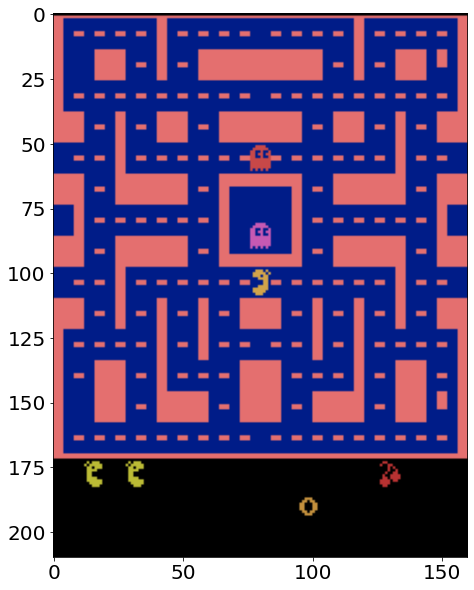

KeyboardInterrupt: ignored

In [ ]:
play()

In [ ]:
from typing import Iterator, Optional, Tuple
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def write_animation(
    itr: Iterator[np.array],
    out_file: Path,
    dpi: int = 50,
    fps: int = 30,
    title: str = "Animation",
    comment: Optional[str] = None,
    writer: str = "ffmpeg",
) -> None:
    """Function that writes an animation from a stream of input tensors.

    Args:
        itr: The image iterator, yielding images with shape (H, W, C).
        out_file: The path to the output file.
        dpi: Dots per inch for output image.
        fps: Frames per second for the video.
        title: Title for the video metadata.
        comment: Comment for the video metadata.
        writer: The Matplotlib animation writer to use (if you use the
            default one, make sure you have `ffmpeg` installed on your
            system).
    """

    first_img = next(itr)
    height, width, _ = first_img.shape
    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi))

    # Ensures that there's no extra space around the image.
    fig.subplots_adjust(
        left=0,
        bottom=0,
        right=1,
        top=1,
        wspace=None,
        hspace=None,
    )

    # Creates the writer with the given metadata.
    Writer = mpl.animation.writers[writer]
    metadata = {
        "title": title,
        "artist": __name__,
        "comment": comment,
    }
    mpl_writer = Writer(
        fps=fps,
        metadata={k: v for k, v in metadata.items() if v is not None},
    )

    with mpl_writer.saving(fig, out_file, dpi=dpi):
        im = ax.imshow(first_img, interpolation="nearest")
        mpl_writer.grab_frame()

        for img in itr:
            im.set_data(img)
            mpl_writer.grab_frame()

AttributeError: ignored

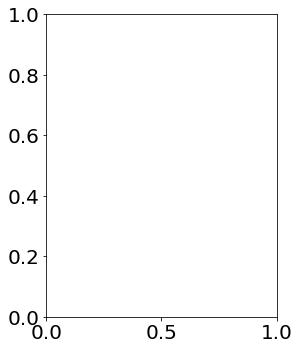

In [ ]:
write_animation(play(), abspath_curr + '/results/'+"test.mp4")

Resources:


*   [Keras RL DQN Sourcecode](https://github.com/keras-rl/keras-rl/blob/master/rl/agents/dqn.py)
*   [Keras RL DQN Atari Example](https://github.com/keras-rl/keras-rl/blob/master/examples/dqn_atari.py)
*   [Keras RL Callbacks](https://github.com/keras-rl/keras-rl/blob/master/rl/core.py)
*   [Atari-py Ms. Pacman C++ Sourcecode](https://github.com/openai/atari-py/blob/5ca24caf395320ead8c77440fe729cf53804616a/atari_py/ale_interface/src/games/supported/MsPacman.cpp)
*   [OpenAI Gym Repo](https://github.com/openai/gym)
*   [Arcade Learning Environment Repo](https://github.com/mgbellemare/Arcade-Learning-Environment)
*   [Youtube Example Tutorial](https://www.youtube.com/watch?v=hCeJeq8U0lo)
*   [Reload Model for Continuation of Training](https://github.com/keras-rl/keras-rl/issues/186)
*   [Gym ENV Sourcecode](https://github.com/openai/gym/blob/master/gym/core.py)



In [ ]:
# # OLD model saving, have much better method now with modelintervalcheckpoint!

# def train_model(model, actions, window_length, mode, loading_from_step, total_steps_to_train, interval_steps_to_save, save_dir, model_name, opt):
#   '''
#   Wrapper function to wrap the training in order to have ability to save and load model weights & replay memory over x number of intervals.
#   Also allows for continuation of training from a loaded model.

#   Parameters:
#     model: model object
#     actions: actions list
#     window_length: int, number of input image stacks
#     save_dir: str, directory to save model weights and memory replay
#     mode: str, training mode of form string with options from ['from_scratch', 'resuming_from_load']
#     loading_from_step: int, The last step that was finished training model/memory were saved, will resume on last_finished_training_step + 1. Set to 0 if completely new model.
#     total_steps_to_train: int, the total number of steps to train
#     interval_steps_to_save: int, the intervals to save model and memory
#     model_name: str, name of model to load from in model.name
#     opt: model optimizer

#   Returns:
#     dqn: dqn model

#   https://github.com/keras-rl/keras-rl/issues/186
#   '''
#   directory = os.path.dirname(save_dir)
#   if not os.path.exists(directory):
#       os.makedirs(directory)

#   # Build call backs:
#   callbacks = []
#   # 1. Tensorboard logging
#   # logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#   # tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
#   # callbacks.append(tensorboard_callback)

#   # 2. ModelIntervalCheckpoint
#   checkpoint_weights_filename = save_dir+'model_name'+'_weights_{step}.h5f'
#   model_interval_checkpoint = ModelIntervalCheckpoint(checkpoint_weights_filename, interval=100, verbose=1)
#   callbacks.append(model_interval_checkpoint)
  
#   # Train
#   print('Training Mode: ', mode, '\n\n')

#   last_finished_training_step = loading_from_step

#   for i in range(1, (int((total_steps_to_train-last_finished_training_step)/interval_steps_to_save))+1):
    
#     current_interval = (interval_steps_to_save*i) + loading_from_step

#     # If start of first training round, build clean agent model
#     if mode == 'from_scratch':
#       dqn = build_agent(model, actions, window_length)
#       dqn.compile(opt)
#     # Else if just resuming training from a previous load, we rebuild the agent model with the reloaded memory
#     elif mode == 'resuming_from_load':
#       try:
#         memory = pickle.load(open(save_dir+"{}_memory_{}_to_{}.pkl".format(model_name, last_finished_training_step-interval_steps_to_save, last_finished_training_step), "rb"))
#       except (FileNotFoundError, EOFError):
#         print("Memory file {}{}_memory_{}_to_{}.pkl not found".format(save_dir, model_name, last_finished_training_step-interval_steps_to_save, last_finished_training_step))
#       dqn = build_agent(model, actions, window_length, replay_memory=memory)
#       dqn.compile(opt)
#       try:
#         dqn.load_weights(save_dir+'{}_weights_{}_to_{}.h5f'.format(model_name, last_finished_training_step-interval_steps_to_save, last_finished_training_step))
#       except (OSError):
#         print("File not found")


#     print('Training Intervals {} to {}:'.format(current_interval-interval_steps_to_save, current_interval))
#     dqn.fit(env, nb_steps=interval_steps_to_save, visualize=False, verbose=2, callbacks=callbacks)

#     print('Saving Weights and Replay Memory')
#     # Save weights
#     dqn.save_weights(save_dir+'{}_weights_{}_to_{}.h5f'.format(dqn.model.name, current_interval-interval_steps_to_save, current_interval), overwrite=True)

#     # Save replay experience memory
#     pickle.dump(dqn.memory, open(save_dir+"{}_memory_{}_to_{}.pkl".format(dqn.model.name, current_interval-interval_steps_to_save, current_interval), "wb"))

#     # Update parameters
#     mode = 'resuming_from_load'
#     last_finished_training_step = current_interval
#     model_name = dqn.model.name
  
#     print('\n\nPercentage Done: ', ((current_interval-loading_from_step)/(total_steps_to_train-loading_from_step))*100, '%')

#   return dqn
